In [1]:
import pandas as pd 
import geopandas as gpd
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from geobr import read_state

In [2]:
#carregando data frame
df = pd.read_excel('Dados\Movimentacao_Salas_Natureza_Juridica-adesão SIPNI e SIES-final.xlsx', sheet_name='Adesao salas UF SIPNI e SIES', usecols='A:G')

<>:2: SyntaxWarning: invalid escape sequence '\M'
<>:2: SyntaxWarning: invalid escape sequence '\M'
C:\Users\nicol\AppData\Local\Temp\ipykernel_4052\777694831.py:2: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_excel('Dados\Movimentacao_Salas_Natureza_Juridica-adesão SIPNI e SIES-final.xlsx', sheet_name='Adesao salas UF SIPNI e SIES', usecols='A:G')


In [3]:
#estados brasileiros
estates = read_state(code_state='all', year=2020)

In [4]:
estates.drop(columns=['code_state', 'code_region', 'name_region'], inplace=True)

In [5]:
estates.head()

,abbrev_state,name_state,geometry
0,RO,Rondônia,"MULTIPOLYGON (((-65.3815 -10.42907, -65.38013 ..."
1,AC,Acre,"MULTIPOLYGON (((-71.07772 -9.82774, -71.07817 ..."
2,AM,Amazônas,"MULTIPOLYGON (((-69.83766 -3.68659, -69.82555 ..."
3,RR,Roraima,"MULTIPOLYGON (((-63.96008 2.47313, -63.96041 2..."
4,PA,Pará,"MULTIPOLYGON (((-51.43248 -0.47334, -51.42949 ..."


In [6]:
estates.columns = ['UF', 'nome_estado', 'geometry']

In [7]:
#renomeando as colunas
df.columns = ['UF', 'Regiao', 'SomaSalas_RNDS', 'SomaSalas_SIPNI', 'Adesao_SIPNI', 'SomaSalas_SIES', 'Adesao_SIES']

In [8]:
df["Adesao_SIPNI"].unique()

array([0.1971831 , 0.25496689, 0.4556962 , 0.16666667, 0.18304323,
       0.30639175, 0.18965517, 0.00176678, 0.42015968, 0.20684126,
       0.24693213, 0.42727273, 0.29057592, 0.39987484, 0.17620137,
       0.38644471, 0.37332054, 0.39632829, 0.05056514, 0.03508772,
       0.42647059, 0.47787611, 0.66684962, 0.41416667, 0.13317191,
       0.45770593, 0.49393939, 0.31687459])

In [9]:
df["Adesao_SIES"].unique()

array([0.00938967, 0.03200883, 0.00158228,        nan, 0.05418304,
       0.04494845, 0.73563218, 0.16267465, 0.09090909, 0.12      ,
       0.92539267, 0.13704631, 0.00381388, 0.05667856, 0.50593952,
       0.00237954, 0.46078431, 0.55752212, 0.02469813, 0.55166667,
       0.55868025, 0.13939394, 0.17945463])

In [10]:
df["Adesao_SIES"] = df["Adesao_SIES"].fillna(-0.001)

In [11]:
df["Adesao_SIES"].unique()

array([ 0.00938967,  0.03200883,  0.00158228, -0.001     ,  0.05418304,
        0.04494845,  0.73563218,  0.16267465,  0.09090909,  0.12      ,
        0.92539267,  0.13704631,  0.00381388,  0.05667856,  0.50593952,
        0.00237954,  0.46078431,  0.55752212,  0.02469813,  0.55166667,
        0.55868025,  0.13939394,  0.17945463])

In [12]:
df = pd.merge(df, estates, on='UF', how='left')

In [13]:
df.head()

,UF,Regiao,SomaSalas_RNDS,SomaSalas_SIPNI,Adesao_SIPNI,SomaSalas_SIES,Adesao_SIES,nome_estado,geometry
0,AC,Norte,213,42,0.197183,2,0.009390,Acre,"MULTIPOLYGON (((-71.07772 -9.82774, -71.07817 ..."
1,AL,Nordeste,906,231,0.254967,29,0.032009,Alagoas,"MULTIPOLYGON (((-35.75791 -9.69285, -35.75801 ..."
2,AM,Norte,632,288,0.455696,1,0.001582,Amazônas,"MULTIPOLYGON (((-69.83766 -3.68659, -69.82555 ..."
3,AP,Norte,114,19,0.166667,Sem informação,-0.001000,Amapá,"MULTIPOLYGON (((-50.45011 2.10924, -50.44715 2..."
4,BA,Nordeste,3562,652,0.183043,193,0.054183,Bahia,"MULTIPOLYGON (((-38.69616 -17.97901, -38.69618..."


In [14]:
gdf = gpd.GeoDataFrame(df, geometry='geometry')

In [15]:
gdf.head(3)

,UF,Regiao,SomaSalas_RNDS,SomaSalas_SIPNI,Adesao_SIPNI,SomaSalas_SIES,Adesao_SIES,nome_estado,geometry
0,AC,Norte,213,42,0.197183,2,0.009390,Acre,"MULTIPOLYGON (((-71.07772 -9.82774, -71.07817 ..."
1,AL,Nordeste,906,231,0.254967,29,0.032009,Alagoas,"MULTIPOLYGON (((-35.75791 -9.69285, -35.75801 ..."
2,AM,Norte,632,288,0.455696,1,0.001582,Amazônas,"MULTIPOLYGON (((-69.83766 -3.68659, -69.82555 ..."


In [16]:
print(gdf.columns)

Index(['UF', 'Regiao', 'SomaSalas_RNDS', 'SomaSalas_SIPNI', 'Adesao_SIPNI',
       'SomaSalas_SIES', 'Adesao_SIES', 'nome_estado', 'geometry'],
      dtype='object')


In [17]:
cmap = ListedColormap(['red', 'orange', 'yellow', 'green'])

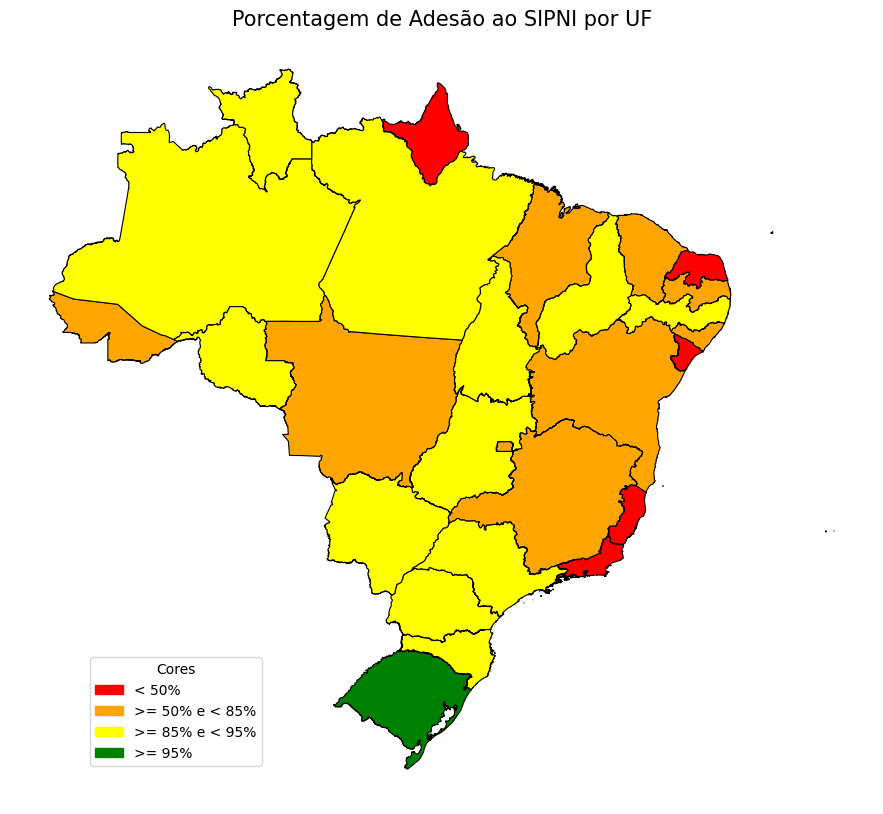

In [18]:
grafico = gdf.plot(column='Adesao_SIPNI', cmap=cmap, edgecolor='black', linewidth=0.8, legend=False, figsize=(15, 10))

grafico.set_title("Porcentagem de Adesão ao SIPNI por UF", fontsize=15)

#remover os tucks e labels dos eixos
grafico.set_xticks([])
grafico.set_yticks([])
grafico.set_xticklabels([])
grafico.set_yticklabels([])

grafico.spines['top'].set_visible(False)
grafico.spines['right'].set_visible(False)
grafico.spines['bottom'].set_visible(False)
grafico.spines['left'].set_visible(False)

handles = [
    mpatches.Patch(color='red', label='< 50%'),
    mpatches.Patch(color='orange', label='>= 50% e < 85%'),
    mpatches.Patch(color='yellow', label='>= 85% e < 95%'),
    mpatches.Patch(color='green', label='>= 95%')
]

plt.legend(
    handles=handles,
    title='Cores',
    bbox_to_anchor=(0.3, 0.2),
)

plt.savefig('Imagens/SIPNI.jpeg', dpi=600, bbox_inches='tight')

plt.show()

In [19]:
# Criar as categorias
gdf['Adesao_SIES_CATEG'] = pd.cut(
    gdf['Adesao_SIES'],
    bins=[-1, 0, 0.5, 0.85, 0.95, 1],
    labels=[0, 1, 2, 3, 4],  # Mapeia para índices de cores
    include_lowest=True
)

In [20]:
cmap2 = ListedColormap(['gray', 'red', 'orange', 'yellow', 'green'])

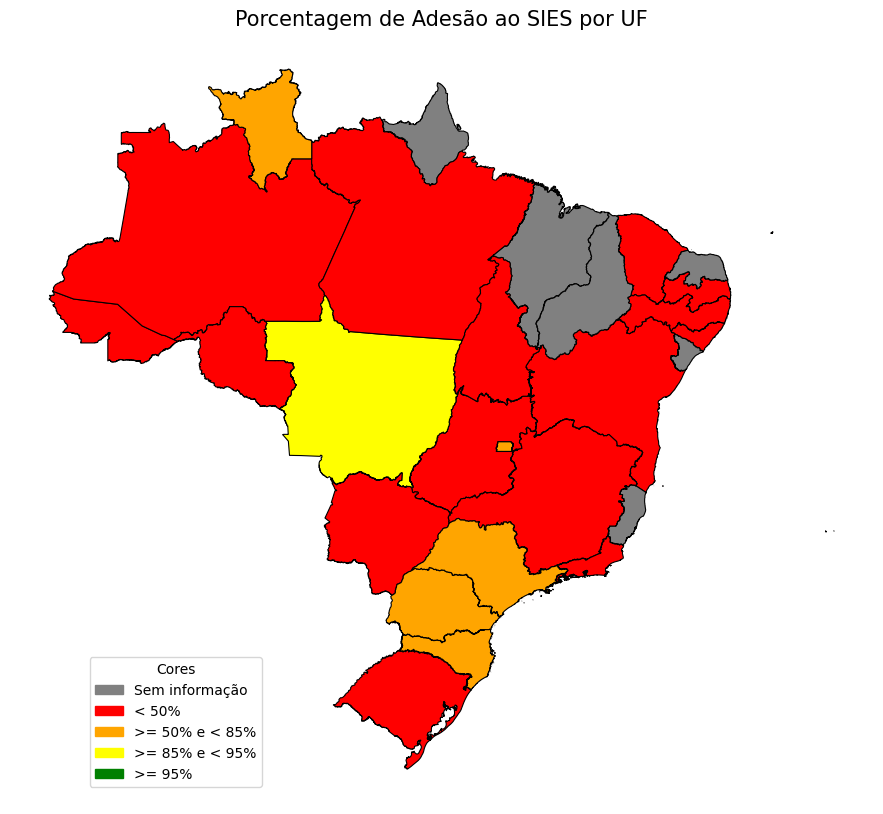

In [21]:
grafico = gdf.plot(column='Adesao_SIES_CATEG', cmap=cmap2, edgecolor='black', linewidth=0.8, legend=False, figsize=(15, 10))

grafico.set_title("Porcentagem de Adesão ao SIES por UF", fontsize=15)

#remover os tucks e labels dos eixos
grafico.set_xticks([])
grafico.set_yticks([])
grafico.set_xticklabels([])
grafico.set_yticklabels([])

grafico.spines['top'].set_visible(False)
grafico.spines['right'].set_visible(False)
grafico.spines['bottom'].set_visible(False)
grafico.spines['left'].set_visible(False)

handles = [
    mpatches.Patch(color='gray', label='Sem informação'),
    mpatches.Patch(color='red', label='< 50%'),
    mpatches.Patch(color='orange', label='>= 50% e < 85%'),
    mpatches.Patch(color='yellow', label='>= 85% e < 95%'),
    mpatches.Patch(color='green', label='>= 95%')
]

plt.legend(
    handles=handles,
    title='Cores',
    bbox_to_anchor=(0.3, 0.2),
)

plt.savefig('Imagens/SIES.jpeg', dpi=600, bbox_inches='tight')

plt.show()